# 20.8 Challenge

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-missing-values" data-toc-modified-id="Dealing-with-missing-values-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Dealing with missing values</a></span><ul class="toc-item"><li><span><a href="#Updating-missing-values-using-the-world-bank-API" data-toc-modified-id="Updating-missing-values-using-the-world-bank-API-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Updating missing values using the world bank API</a></span></li><li><span><a href="#Interpolating-and-dropping-remaining-missing-values" data-toc-modified-id="Interpolating-and-dropping-remaining-missing-values-0.1.2"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>Interpolating and dropping remaining missing values</a></span></li></ul></li><li><span><a href="#Dealing-with-outliers" data-toc-modified-id="Dealing-with-outliers-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Dealing with outliers</a></span><ul class="toc-item"><li><span><a href="#Winsorizing-outliers" data-toc-modified-id="Winsorizing-outliers-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Winsorizing outliers</a></span></li></ul></li><li><span><a href="#Converting-numeric-columns-to-float-and-'Status'-to-dummy" data-toc-modified-id="Converting-numeric-columns-to-float-and-'Status'-to-dummy-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Converting numeric columns to float and 'Status' to dummy</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration</a></span></li></ul></div>

In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

`postgres_user = 'dsbc_student'
postgres_pw = '7\*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'`

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

## Data cleaning

In [1]:
#Custom installs
!pip install world_bank_data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

data = pd.read_sql_query('select * from lifeexpectancy',con=engine)
engine.dispose()

In [5]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [7]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
len(data['Country'].unique())

193

### Dealing with missing values

In [9]:
data2 = data.copy()
print(id(data), id(data2))

5023386640 5055671312


In [10]:
data2 = data2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data2.columns = data2.columns.str.strip()

In [11]:
data.isna().sum()/data.isna().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

Some variables contain missing values, so we start by interpolating the data for a given country.

In [12]:
for country in data2['Country'].unique():
    data2.loc[data2['Country'] == country] = data2.loc[data2['Country'] == country].interpolate()
    
data.isna().sum()/data.isna().count() - data2.isna().sum()/data2.isna().count()

 BMI                                    NaN
 HIV/AIDS                               NaN
 thinness  1-19 years                   NaN
 thinness 5-9 years                     NaN
Adult Mortality                    0.000000
Alcohol                            0.000681
BMI                                     NaN
Country                            0.000000
Diphtheria                              NaN
Diphtheria                              NaN
GDP                                0.008850
HIV/AIDS                                NaN
Hepatitis B                        0.139210
Income composition of resources    0.000000
Life expectancy                         NaN
Life expectancy                         NaN
Measles                                 NaN
Measles                                 NaN
Polio                              0.006467
Population                         0.000000
Schooling                          0.000000
Status                             0.000000
Total expenditure               

There still remain some missing values, so we dive deeper into the types of missing values.

In [13]:
data2.shape

(2938, 22)

In [14]:
data2.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            192
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                                0
Total expenditure                  210
Diphtheria                           0
HIV/AIDS                             0
GDP                                422
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

#### Updating missing values using the world bank API

Since GDP and Population are fairly common stats, we will try use a public world-bank to fill in some of the values. First, we must get the country codes (the format used by the worldbank), and merge these values with the overall data.

In [15]:
import world_bank_data as wb

country_codes = wb.get_countries()[['iso2Code', 'name', 'region']]
country_codes.rename(columns = {'name':'Country'}, inplace = True)
country_codes.head()

,iso2Code,Country,region
id,,,
ABW,AW,Aruba,Latin America & Caribbean
AFG,AF,Afghanistan,South Asia
AFR,A9,Africa,Aggregates
AGO,AO,Angola,Sub-Saharan Africa
ALB,AL,Albania,Europe & Central Asia


In [16]:
data3 = data2.merge(country_codes, on='Country', how = 'left')
data3['Country'].loc[data3['iso2Code'].isna()].value_counts()[:15]

Czechia                                      16
Slovakia                                     16
Swaziland                                    16
United States of America                     16
Lao People's Democratic Republic             16
Gambia                                       16
Republic of Moldova                          16
The former Yugoslav republic of Macedonia    16
Micronesia (Federated States of)             16
Kyrgyzstan                                   16
Yemen                                        16
Congo                                        16
Democratic Republic of the Congo             16
Egypt                                        16
Bahamas                                      16
Name: Country, dtype: int64

We notice that some of the countries have not automatically merged on the isoCode.

In [17]:
manual_codes = {
    'Republic of Korea': "KR",
    'Egypt': "EG",
    'Kyrgyzstan': "KG",
    'Saint Vincent and the Grenadines': "VC",
    'Republic of Moldova': "MD",
    'The former Yugoslav republic of Macedonia': "MK",
    'Gambia': "GM",
    'Congo': "CG",
    'Saint Lucia': "LC",
    "Democratic People's Republic of Korea": "KP",
    'Bahamas': "BS",
    'Slovakia': "SK",
    "Democratic Republic of the Congo": "CD",
    "United States of America": "US",
    "Lao People's Democratic Republic": "LA",
    "Iran (Islamic Republic of)": "IR",
    "Côte d'Ivoire": "CI",
    "Czechia": "CZ",
    "United Republic of Tanzania": "TZ",
    "Venezuela (Bolivarian Republic of)": "VE",
    'Yemen': "YE",
    'Micronesia (Federated States of)': "FM",
    'Bolivia (Plurinational State of)': "BO",
    'Viet Nam': "VN",
    'United Kingdom of Great Britain and Northern Ireland': "GB",
    'Saint Kitts and Nevis': "KN"
}

for country in manual_codes:
    data3['iso2Code'].loc[data3['Country'] == country] = manual_codes[country]
    
data3['Country'].loc[data3['iso2Code'].isna()].value_counts()[:15]

Swaziland       16
Niue             1
Cook Islands     1
Name: Country, dtype: int64

We first get the list of countries with missing GDP and population values, with the respective year.

In [18]:
missingvals = data3.loc[(data3['Population'].isna()) | (data3['GDP'].isna())]
missingvals = missingvals[['Country', 'Year', 'GDP', 'Population', 'iso2Code']]
len(missingvals)

661

And lastly, we complete the missing data for each given country, year, and variable.

In [19]:
import math

counter = 0

for index, code in enumerate(missingvals['iso2Code'].unique()):
    years_updated = set()
    new_pop = 0
    new_gdp = 0
    
    for year in missingvals['Year'].loc[missingvals['iso2Code'] == code].unique():
  
        country = missingvals['Country'].loc[(missingvals['iso2Code'] == code) & (missingvals['Year'] == year)].values[0]
        current_gdp = missingvals['GDP'].loc[(missingvals['iso2Code'] == code) & (missingvals['Year'] == year)].values[0]
        current_pop = missingvals['Population'].loc[(missingvals['iso2Code'] == code) & (missingvals['Year'] == year)].values[0]
        
        
        try:
            new_pop = wb.get_series('SP.POP.TOTL', date = year, country = code).values[0] 
            new_gdp = wb.get_series('GDP (current $)	', date = year, country = code).values[0]
        except:
            pass
            
                
        data3['GDP'].loc[(data3['iso2Code'] == code) & (data3['Year'] == year)] = new_gdp
        data3['Population'].loc[(data3['iso2Code'] == code) & (data3['Year'] == year)] = new_pop
        
        print('GDP and Population for {} ({} - {}) updated.'.format(country, code, year))

GDP and Population for Côte d'Ivoire (CI - 2001) updated.
GDP and Population for Côte d'Ivoire (CI - 2015) updated.
GDP and Population for Côte d'Ivoire (CI - 2014) updated.
GDP and Population for Côte d'Ivoire (CI - 2013) updated.
GDP and Population for Côte d'Ivoire (CI - 2012) updated.
GDP and Population for Côte d'Ivoire (CI - 2011) updated.
GDP and Population for Côte d'Ivoire (CI - 2010) updated.
GDP and Population for Côte d'Ivoire (CI - 2009) updated.
GDP and Population for Côte d'Ivoire (CI - 2008) updated.
GDP and Population for Côte d'Ivoire (CI - 2007) updated.
GDP and Population for Côte d'Ivoire (CI - 2006) updated.
GDP and Population for Côte d'Ivoire (CI - 2005) updated.
GDP and Population for Côte d'Ivoire (CI - 2004) updated.
GDP and Population for Côte d'Ivoire (CI - 2003) updated.
GDP and Population for Côte d'Ivoire (CI - 2002) updated.
GDP and Population for Côte d'Ivoire (CI - 2000) updated.
GDP and Population for Antigua and Barbuda (AG - 2015) updated.
GDP and 

GDP and Population for Cuba (CU - 2000) updated.
GDP and Population for Czechia (CZ - 2015) updated.
GDP and Population for Czechia (CZ - 2014) updated.
GDP and Population for Czechia (CZ - 2013) updated.
GDP and Population for Czechia (CZ - 2012) updated.
GDP and Population for Czechia (CZ - 2011) updated.
GDP and Population for Czechia (CZ - 2010) updated.
GDP and Population for Czechia (CZ - 2009) updated.
GDP and Population for Czechia (CZ - 2008) updated.
GDP and Population for Czechia (CZ - 2007) updated.
GDP and Population for Czechia (CZ - 2006) updated.
GDP and Population for Czechia (CZ - 2005) updated.
GDP and Population for Czechia (CZ - 2004) updated.
GDP and Population for Czechia (CZ - 2003) updated.
GDP and Population for Czechia (CZ - 2002) updated.
GDP and Population for Czechia (CZ - 2001) updated.
GDP and Population for Czechia (CZ - 2000) updated.
GDP and Population for Democratic People's Republic of Korea (KP - 2015) updated.
GDP and Population for Democratic Peo

GDP and Population for Kuwait (KW - 2013) updated.
GDP and Population for Kuwait (KW - 2012) updated.
GDP and Population for Kuwait (KW - 2011) updated.
GDP and Population for Kuwait (KW - 2010) updated.
GDP and Population for Kuwait (KW - 2009) updated.
GDP and Population for Kuwait (KW - 2008) updated.
GDP and Population for Kuwait (KW - 2007) updated.
GDP and Population for Kuwait (KW - 2006) updated.
GDP and Population for Kuwait (KW - 2005) updated.
GDP and Population for Kuwait (KW - 2004) updated.
GDP and Population for Kuwait (KW - 2003) updated.
GDP and Population for Kuwait (KW - 2002) updated.
GDP and Population for Kuwait (KW - 2001) updated.
GDP and Population for Kuwait (KW - 2000) updated.
GDP and Population for Kyrgyzstan (KG - 2015) updated.
GDP and Population for Kyrgyzstan (KG - 2014) updated.
GDP and Population for Kyrgyzstan (KG - 2013) updated.
GDP and Population for Kyrgyzstan (KG - 2012) updated.
GDP and Population for Kyrgyzstan (KG - 2011) updated.
GDP and Pop

GDP and Population for Republic of Korea (KR - 2004) updated.
GDP and Population for Republic of Korea (KR - 2003) updated.
GDP and Population for Republic of Korea (KR - 2002) updated.
GDP and Population for Republic of Korea (KR - 2001) updated.
GDP and Population for Republic of Korea (KR - 2000) updated.
GDP and Population for Republic of Moldova (MD - 2015) updated.
GDP and Population for Republic of Moldova (MD - 2014) updated.
GDP and Population for Republic of Moldova (MD - 2013) updated.
GDP and Population for Republic of Moldova (MD - 2012) updated.
GDP and Population for Republic of Moldova (MD - 2011) updated.
GDP and Population for Republic of Moldova (MD - 2010) updated.
GDP and Population for Republic of Moldova (MD - 2009) updated.
GDP and Population for Republic of Moldova (MD - 2008) updated.
GDP and Population for Republic of Moldova (MD - 2007) updated.
GDP and Population for Republic of Moldova (MD - 2006) updated.
GDP and Population for Republic of Moldova (MD - 2

GDP and Population for United Arab Emirates (AE - 2013) updated.
GDP and Population for United Arab Emirates (AE - 2012) updated.
GDP and Population for United Arab Emirates (AE - 2011) updated.
GDP and Population for United Arab Emirates (AE - 2010) updated.
GDP and Population for United Arab Emirates (AE - 2009) updated.
GDP and Population for United Arab Emirates (AE - 2008) updated.
GDP and Population for United Arab Emirates (AE - 2007) updated.
GDP and Population for United Arab Emirates (AE - 2006) updated.
GDP and Population for United Arab Emirates (AE - 2005) updated.
GDP and Population for United Arab Emirates (AE - 2004) updated.
GDP and Population for United Arab Emirates (AE - 2003) updated.
GDP and Population for United Arab Emirates (AE - 2002) updated.
GDP and Population for United Arab Emirates (AE - 2001) updated.
GDP and Population for United Arab Emirates (AE - 2000) updated.
GDP and Population for United Kingdom of Great Britain and Northern Ireland (GB - 2015) up

And lastly, we need to update the larger data file with these new values.

In [72]:
data4 = data3.merge(missingvals, on=['Country', 'Year', 'iso2Code'], suffixes=('_old', '_new'), how = 'outer')
data4['Population_new'].fillna(data4['Population_old'], inplace = True)
data4['GDP_new'].fillna(data4['GDP_old'], inplace = True)
data4.drop(columns = ['Population_old', 'GDP_old'], inplace = True)

data4.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            192
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                                0
Total expenditure                  210
Diphtheria                           0
HIV/AIDS                             0
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
iso2Code                            18
region                             419
GDP_new                              2
Population_new                       6
dtype: int64

#### Interpolating and dropping remaining missing values

We notice that there are still quite a few missing variables. To best determine the course of action, we create a heatmap to see which variables currently have the highest correlation with Life Expectancy.

(20.5, -0.5)

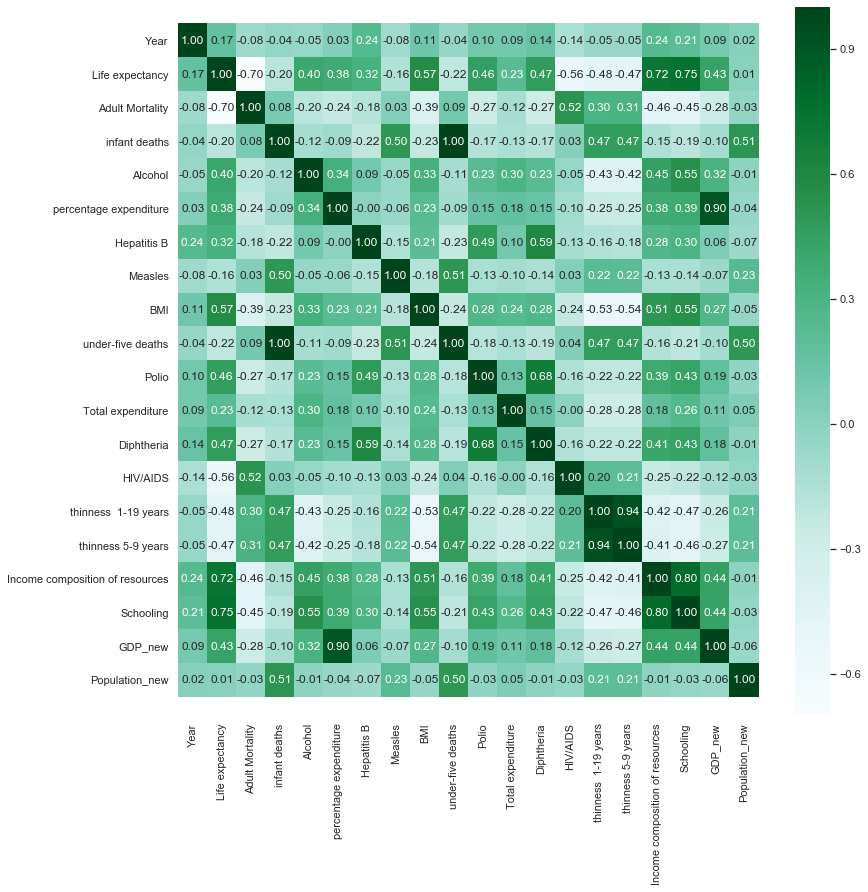

In [73]:
corr = data4.corr()

plt.figure(figsize=(13, 13))
ax = sns.heatmap(corr, annot=True, fmt = '.2f', cmap='BuGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From this heat map, we see that `Adult mortality`, `BMI`, `HIV/AIDS`, `Income composition of resources` and `Schooling` have some of the highest absolute values for correlation, and none of them seem to be missing in a very high proportion, so we can just interpolate the missing values and carry on.

In [74]:
len(data4)

2938

In [75]:
data4.isna().sum()/data4.isna().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.065351
percentage expenditure             0.000000
Hepatitis B                        0.049013
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.071477
Diphtheria                         0.000000
HIV/AIDS                           0.000000
thinness  1-19 years               0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
iso2Code                           0.006127
region                             0.142614
GDP_new                         

In [76]:
numeric_cols = ['Adult Mortality',
               'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
               'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
               'Diphtheria', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years',
               'Income composition of resources', 'Schooling',
               'GDP_new', 'Population_new']

In [77]:
for country in data4['Country'].unique():
    for col in numeric_cols:
        data4[col].loc[data4['Country'] == country] = data4[col].loc[data4['Country']
                                                                     == country].interpolate(kind='time')

In [78]:
data4.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            192
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                                0
Total expenditure                  210
Diphtheria                           0
HIV/AIDS                             0
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
iso2Code                            18
region                             419
GDP_new                              2
Population_new                       6
dtype: int64

And we quickly explore how big the missing data problem is...

In [140]:
data4.groupby(by = 'Country').count() < 16

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,iso2Code,region,GDP_new,Population_new
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Argentina,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Armenia,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Australia,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Austria,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
data4['Country'].loc[data4['Alcohol'].isna()].value_counts()[:5]

South Sudan                              16
Russian Federation                        1
Luxembourg                                1
Brunei Darussalam                         1
Democratic People's Republic of Korea     1
Name: Country, dtype: int64

In [94]:
data4['Country'].loc[data4['Hepatitis B'].isna()].value_counts()[:5]

United Kingdom of Great Britain and Northern Ireland    16
Denmark                                                 16
Japan                                                   16
Iceland                                                 16
Finland                                                 16
Name: Country, dtype: int64

In [95]:
data4['Country'].loc[data4['Total expenditure'].isna()].value_counts()[:5]

Democratic People's Republic of Korea    16
Somalia                                  16
Ghana                                     1
Botswana                                  1
Luxembourg                                1
Name: Country, dtype: int64

In [96]:
data4['Country'].loc[data4['Schooling'].isna()].value_counts()[:5]

Somalia                                                 16
Czechia                                                 16
United Kingdom of Great Britain and Northern Ireland    16
Republic of Korea                                       16
Democratic Republic of the Congo                        16
Name: Country, dtype: int64

In [98]:
data4['Country'].loc[data4['region'].isna()].value_counts()[:5]

Czechia                             16
Slovakia                            16
Swaziland                           16
United States of America            16
Lao People's Democratic Republic    16
Name: Country, dtype: int64

In [79]:
data_temp = data4.copy()

### Dealing with outliers

In [80]:
countries = data4['Country'].unique()

#### Winsorizing outliers

Naturally, we winsorize these variables at the 97th percentile.

In [81]:
data5 = data4.copy()
data5['corrected'] = ""

for col in numeric_cols:
    data5[col + '_corrected'] = ""

for country in countries:
    corrected = False

    if country in countries_to_be_winsorized:
        data5['corrected'].loc[data5['Country'] == country] = 1
        corrected = True
    else:
        data5['corrected'].loc[data5['Country'] == country] = 0

    for col in numeric_cols:
        if corrected and col in countries_to_be_winsorized[country]:
            data5[col + '_corrected'].loc[data5['Country'] == country] = winsorize(
                data5[col].loc[data5['Country'] == country], limits=(0, 0.03))
            
        else:
            data5[col + '_corrected'].loc[data5['Country'] == country] = data5[col].loc[data5['Country'] == country]

In [82]:
data5 = data5.drop(columns = numeric_cols)

numeric_cols = list(data5.columns)
numeric_cols.remove('Country')
numeric_cols.remove('Status')
numeric_cols.remove('corrected')
numeric_cols.remove('iso2Code')
numeric_cols.remove('region')
numeric_cols

['Year',
 'Life expectancy',
 'Adult Mortality_corrected',
 'infant deaths_corrected',
 'Alcohol_corrected',
 'percentage expenditure_corrected',
 'Hepatitis B_corrected',
 'Measles_corrected',
 'BMI_corrected',
 'under-five deaths_corrected',
 'Polio_corrected',
 'Total expenditure_corrected',
 'Diphtheria_corrected',
 'HIV/AIDS_corrected',
 'thinness  1-19 years_corrected',
 'thinness 5-9 years_corrected',
 'Income composition of resources_corrected',
 'Schooling_corrected',
 'GDP_new_corrected',
 'Population_new_corrected']

### Converting numeric columns to float and 'Status' to dummy

In [83]:
data5 = pd.concat([data5, pd.get_dummies(data5['Status'], drop_first = True)], axis = 1)

for col in numeric_cols:
    data5[col] = data5[col].astype('float')
    
data_ready = data5.copy()

## Data Exploration

In [84]:
data_ready.groupby(by=['Status']).mean()

,Year,Life expectancy,corrected,Adult Mortality_corrected,infant deaths_corrected,Alcohol_corrected,percentage expenditure_corrected,Hepatitis B_corrected,Measles_corrected,BMI_corrected,...,Total expenditure_corrected,Diphtheria_corrected,HIV/AIDS_corrected,thinness 1-19 years_corrected,thinness 5-9 years_corrected,Income composition of resources_corrected,Schooling_corrected,GDP_new_corrected,Population_new_corrected,Developing
Status,,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,0.625000,79.685547,1.494141,9.826736,2703.600380,83.302083,499.005859,51.803906,...,7.554042,93.476562,0.100000,1.320703,1.296680,0.852489,15.845474,19296.713140,1.769026e+07,0
Developing,2007.522671,67.111465,0.685903,182.833195,36.384171,3.482929,323.470285,74.643154,2824.926216,35.435326,...,5.573859,79.669002,2.088664,5.592935,5.635242,0.582310,11.219256,3619.147567,1.473458e+07,1


We dive further into the `Developing` countries to probe other trends:

In [85]:
data_ready.loc[data_ready['Status'] == 'Developing'].groupby(by = 'region').mean().sort_values(by = 'Life expectancy')

,Year,Life expectancy,corrected,Adult Mortality_corrected,infant deaths_corrected,Alcohol_corrected,percentage expenditure_corrected,Hepatitis B_corrected,Measles_corrected,BMI_corrected,...,Total expenditure_corrected,Diphtheria_corrected,HIV/AIDS_corrected,thinness 1-19 years_corrected,thinness 5-9 years_corrected,Income composition of resources_corrected,Schooling_corrected,GDP_new_corrected,Population_new_corrected,Developing
region,,,,,,,,,,,,,,,,,,,,,
Sub-Saharan Africa,2007.500000,57.339435,0.833333,278.315476,44.755952,2.944992,109.660489,64.309524,3812.318452,20.194687,...,5.394033,66.849702,5.598363,7.476094,7.415312,0.436239,8.866463,1387.578565,8.515044e+06,1
South Asia,2007.500000,67.374219,0.750000,164.507812,250.039062,0.739504,123.477956,68.492188,7953.851562,16.353125,...,5.226860,80.859375,0.158594,17.051563,17.327344,0.503211,9.935156,1111.916322,6.982420e+07,1
East Asia & Pacific,2007.579710,68.982353,0.753623,153.503676,35.398551,1.636822,215.329660,75.264493,5936.297101,35.886594,...,4.366409,78.887681,0.259783,4.480797,5.053623,0.597864,11.440942,2869.019259,1.385459e+07,1
Europe & Central Asia,2007.535948,72.836842,0.679739,138.036184,5.679739,6.020712,652.563422,77.493103,1009.062092,48.587171,...,6.256979,88.751634,0.145098,2.421053,2.457566,0.686454,13.240328,6283.027471,8.862592e+06,1
Latin America & Caribbean,2007.513189,73.185096,0.882494,130.932692,7.992806,5.456496,428.405527,83.709832,9.045564,45.121103,...,6.460614,86.676259,0.461151,2.700959,2.644125,0.657585,12.634053,4395.131237,9.770488e+06,1
Middle East & North Africa,2007.500000,73.355078,0.812500,97.683594,6.550781,0.884125,695.025501,86.792969,650.378906,51.046875,...,4.828250,87.847656,0.298828,5.372266,5.232422,0.699949,12.449609,10336.102324,7.826979e+06,1
North America,2007.500000,81.687500,1.000000,64.625000,2.000000,8.053333,4694.078971,26.062500,129.500000,55.862500,...,7.052000,91.062500,0.100000,0.506250,0.437500,0.892188,15.875000,29382.907523,1.136405e+07,1


In [91]:
data_ready.loc[data_ready['Country'] == 'United States of America']

,Country,Year,Status,Life expectancy,iso2Code,region,corrected,Adult Mortality_corrected,infant deaths_corrected,Alcohol_corrected,...,Total expenditure_corrected,Diphtheria_corrected,HIV/AIDS_corrected,thinness 1-19 years_corrected,thinness 5-9 years_corrected,Income composition of resources_corrected,Schooling_corrected,GDP_new_corrected,Population_new_corrected,Developing
2794,United States of America,2015.0,Developed,79.3,US,NaN,0,13.0,23.0,NaN,...,NaN,95.0,0.1,0.8,0.6,NaN,NaN,0.0,320742673.0,0
2795,United States of America,2014.0,Developed,79.1,US,NaN,0,14.0,23.0,8.82,...,17.14,95.0,0.1,0.8,0.6,NaN,NaN,0.0,318386421.0,0
2796,United States of America,2013.0,Developed,78.9,US,NaN,0,16.0,23.0,8.82,...,16.90,94.0,0.1,0.7,0.6,NaN,NaN,0.0,316057727.0,0
2797,United States of America,2012.0,Developed,78.8,US,NaN,0,16.0,24.0,8.82,...,17.20,94.0,0.1,0.7,0.6,NaN,NaN,0.0,313874218.0,0
2798,United States of America,2011.0,Developed,78.7,US,NaN,0,16.0,25.0,8.67,...,17.60,96.0,0.1,0.7,0.6,NaN,NaN,0.0,311580009.0,0
2799,United States of America,2010.0,Developed,78.7,US,NaN,0,15.0,25.0,8.55,...,17.20,95.0,0.1,0.7,0.6,NaN,NaN,0.0,309326085.0,0
2800,United States of America,2009.0,Developed,78.5,US,NaN,0,18.0,26.0,8.71,...,17.00,95.0,0.1,0.7,0.6,NaN,NaN,0.0,306771529.0,0
2801,United States of America,2008.0,Developed,78.2,US,NaN,0,18.0,27.0,8.74,...,16.20,96.0,0.1,0.7,0.6,NaN,NaN,0.0,304093966.0,0
2802,United States of America,2007.0,Developed,78.1,US,NaN,0,11.0,27.0,8.74,...,15.57,96.0,0.1,0.7,0.6,NaN,NaN,0.0,301231207.0,0
2803,United States of America,2006.0,Developed,77.8,US,NaN,0,113.0,28.0,8.63,...,15.27,96.0,0.1,0.7,0.6,NaN,NaN,0.0,298379912.0,0


In [ ]:
corr = data_ready.corr()

plt.figure(figsize=(15, 15))
ax = sns.heatmap(corr, annot=True, fmt = '.2f', cmap='RdGy')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
imp_vars = ['Adult Mortality_corrected', 'BMI_corrected', 'HIV/AIDS_corrected',
            'Income composition of resources_corrected', 'Schooling_corrected', 'Developing', 'Life expectancy',
           'thinness  1-19 years_corrected', 'thinness 5-9 years_corrected']

In [ ]:
numeric_cols.remove('Year')
numeric_cols

In [ ]:
data_ready.dtypes

In [ ]:
data_ready.dropna(inplace=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data_ready[numeric_cols])

sklearn_pca = PCA(n_components=1)
data_ready['IMP_VARS1'] = sklearn_pca.fit_transform(X)

sklearn_pca.explained_variance_ratio_

In [ ]:
corr = data_ready.corr()

plt.figure(figsize=(15, 15))
ax = sns.heatmap(corr, annot=True, fmt = '.2f', cmap='RdGy')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
data5[['Country', 'GDP_new_corrected', 'Population_new_corrected']].groupby(by = 'Country').mean()

In [ ]:
data5.loc[data5.isna().any(axis = 1)].groupby(by = 'Country').count()

In [ ]:
data_ready.groupby(by=['region', 'Status']).count()